# Regression Analysis

- **When proceeding with a Facebook ad campaign, what can be expected in terms of conversions?**
- **Specifically, based on regression analysis, how many conversions can be anticipated given a certain number of clicks on the Facebook ads?**

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from sklearn import linear_model

# model evaluation
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading dataset
df = pd.read_csv('marketing - Copy.csv')
df.head()

,Date,fb_ad_campaign,fb_impression,fb_clicks,fb_cost,fb_conversion,fb_CTR,fb_CR,fb_CPC,adwords_ad_campaign,adwords_Impressions,adwords_clicks,adwords_cost,adwords_conversion,adwords_CTR,adwords_CR,adwords_CPC
0,01-01-2023,fb_jan23,1194718,141,$254.05,28,0.01%,19.86%,$1.80,adwords_jan23,1772,15,$0.00,1,0.85%,6.67%,$0.00
1,02-01-2023,fb_jan23,637648,67,$122.40,13,0.01%,19.40%,$1.83,adwords_jan23,13329,4,$5.63,1,0.03%,25.00%,$1.41
2,03-01-2023,fb_jan23,24362,55,$0.00,1,0.23%,1.82%,$0.00,adwords_jan23,13659,3,$3.84,1,0.02%,33.33%,$1.28
3,04-01-2023,fb_jan23,459690,50,$86.33,5,0.01%,10.00%,$1.73,adwords_jan23,739,5,$0.00,1,0.68%,20.00%,$0.00
4,05-01-2023,fb_jan23,750060,86,$161.91,11,0.01%,12.79%,$1.88,adwords_jan23,605,5,$0.00,1,0.83%,20.00%,$0.00


In [28]:
# independent variable
X = df[['fb_clicks']]

# dependent variable
y = df[['fb_conversion']]

In [29]:
# Split data in the train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [30]:
# initializing and fitting linera regression model
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# model evaluation
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Accuracy (R2 Score): ',r2)
print('Mean Square Error (MSE): ', round(mse,2))

Accuracy (R2 Score):  0.5130328459450508
Mean Square Error (MSE):  25.42


In [31]:
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - (1 - r2) * (365 - 1) / (365-1-1)
print('Adjusted R2 Score: ', adj_r2)

Adjusted R2 Score:  0.5116913386336046


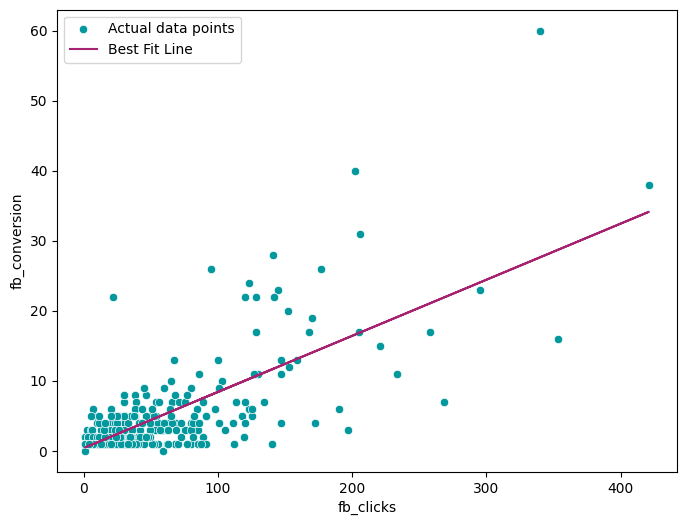

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['fb_clicks'], y=df['fb_conversion'], color='#03989E', label='Actual data points')
plt.plot(df['fb_clicks'], prediction, color='#A62372', label='Best Fit Line')
plt.legend()
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = linear_model.LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.513046527287123
